# Analysis

Author: Holly Bok 

In [1]:
# Import of packages and dataset. The dataset is the 'SalaryPredictions.csv' which has
# all of the basketball players in the testing dataset along with their predicted salaries
# and residuals

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

df = pd.read_csv('datasets/SalaryPredictions.csv')

# Reformatting column names and dropping unncessary columns. 
df.drop(columns='19_20_salary_y', inplace=True)
df.rename(columns={'19_20_salary_x' : '19_20_salary'}, inplace=True)

## Model Analysis

In [2]:
# Creating a list of all predicted salaries and a list of residuals for each player

predictions = df['predicted']
residuals = df['residuals']

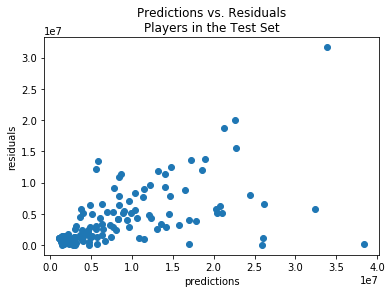

In [3]:
# Plotting predictions vs. residuals

plt.scatter(predictions, residuals)
plt.title('Predictions vs. Residuals\nPlayers in the Test Set')
plt.xlabel('predictions')
plt.ylabel('residuals');

In [4]:
# Observing which players have the highest and lowest residuals

df.sort_values('residuals', ascending=False)

,19_20_salary,predicted,residuals,player_id,player_name,team,height,weight,seasons,points,...,future_salary,avg_pnts_per_game,pct_of_games_started,heights_inches,draft_1st_pick,draft_2nd_pick,draft_undrafted,draft_number_group,draft_nmbr_grp_rank,cluster
98,2159029,3.380806e+07,3.164904e+07,2546,Carmelo Anthony,POR,6-8,238.0,16,26293,...,0,23.623540,0.992812,80,1,0,0,1-10,1,12
142,2564753,2.255881e+07,1.999406e+07,200765,Rajon Rondo,LAL,6-1,180.0,13,8906,...,1,10.213303,0.836009,73,1,0,0,21-30,3,11
78,2564753,2.131181e+07,1.874706e+07,202083,Wesley Matthews,MIL,6-4,220.0,10,10366,...,1,13.188295,0.922392,76,0,0,1,Undrafted,8,11
41,38199000,2.273601e+07,1.546299e+07,202322,John Wall,WAS,6-4,210.0,9,10879,...,1,18.986038,0.979058,76,1,0,0,1-10,1,11
146,32742000,1.899032e+07,1.375168e+07,202699,Tobias Harris,PHI,6-8,226.0,8,9679,...,1,15.867213,0.803279,80,1,0,0,11-20,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,2750000,2.805645e+06,5.564469e+04,1627936,Alex Caruso,LAL,6-5,186.0,2,676,...,1,5.680672,0.100840,77,0,0,1,Undrafted,8,16
13,26000000,2.594822e+07,5.178360e+04,200746,LaMarcus Aldridge,SAS,6-11,250.0,13,19575,...,1,19.535928,0.959082,83,1,0,0,1-10,1,3
24,4767000,4.818058e+06,5.105776e+04,203118,Mike Scott,PHI,6-7,237.0,7,3469,...,1,6.965863,0.042169,79,0,1,0,41-50,5,4
143,1500000,1.453699e+06,4.630087e+04,1628430,Nigel Williams-Goss,UTA,6-2,190.0,0,4,...,1,0.444444,0.000000,74,0,1,0,51-60,6,10


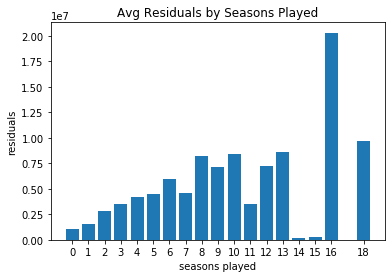

In [5]:
# Plotting average residuals by seasons played

residuals_by_season = df['residuals'].groupby(df['seasons']).mean()
plt.bar(x = residuals_by_season.index, height= residuals_by_season)
plt.xticks(residuals_by_season.index)
plt.title('Avg Residuals by Seasons Played')
plt.xlabel('seasons played')
plt.ylabel('residuals');

In [6]:
# Observing players that have played 16 seasons

df[df['seasons'] == 16]

,19_20_salary,predicted,residuals,player_id,player_name,team,height,weight,seasons,points,...,future_salary,avg_pnts_per_game,pct_of_games_started,heights_inches,draft_1st_pick,draft_2nd_pick,draft_undrafted,draft_number_group,draft_nmbr_grp_rank,cluster
98,2159029,3.380806e+07,3.164904e+07,2546,Carmelo Anthony,POR,6-8,238.0,16,26293,...,0,23.623540,0.992812,80,1,0,0,1-10,1,12
141,2564753,1.149968e+07,8.934931e+06,2617,Udonis Haslem,MIA,6-8,235.0,16,6516,...,0,7.603267,0.582264,80,0,0,1,Undrafted,8,7


In [7]:
# Observing players that have played 14 or 15 seasons

df[(df['seasons'] == 14)|(df['seasons'] == 15)]

,19_20_salary,predicted,residuals,player_id,player_name,team,height,weight,seasons,points,...,future_salary,avg_pnts_per_game,pct_of_games_started,heights_inches,draft_1st_pick,draft_2nd_pick,draft_undrafted,draft_number_group,draft_nmbr_grp_rank,cluster
30,17185185,1.694515e+07,240036.371256,2738,Andre Iguodala,MIA,6-6,215.0,15,13514,...,1,12.055308,0.694915,78,1,0,0,1-10,1,13
120,38506482,3.835537e+07,151111.602569,101108,Chris Paul,OKC,6-1,175.0,14,18711,...,1,18.470879,1.000000,73,1,0,0,1-10,1,12


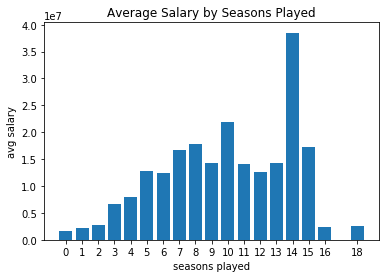

In [8]:
# Plotting salary by Seasons Played

salary_by_season = df['19_20_salary'].groupby(df['seasons']).mean()
plt.bar(x = salary_by_season.index, height= salary_by_season)
plt.xticks(salary_by_season.index)
plt.title('Average Salary by Seasons Played')
plt.xlabel('seasons played')
plt.ylabel('avg salary');

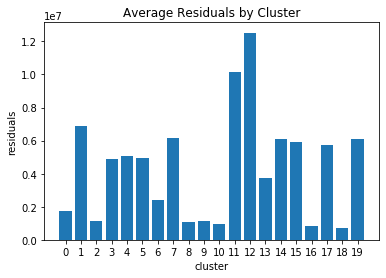

In [9]:
# Plotting residuals by cluster

residuals_by_season = df['residuals'].groupby(df['cluster']).mean()
plt.bar(x = residuals_by_season.index, height= residuals_by_season)
plt.xticks(residuals_by_season.index)
plt.title('Average Residuals by Cluster')
plt.xlabel('cluster')
plt.ylabel('residuals');

In [10]:
# Observing players in cluster 13

df[df['cluster'] == 13]

,19_20_salary,predicted,residuals,player_id,player_name,team,height,weight,seasons,points,...,future_salary,avg_pnts_per_game,pct_of_games_started,heights_inches,draft_1st_pick,draft_2nd_pick,draft_undrafted,draft_number_group,draft_nmbr_grp_rank,cluster
30,17185185,1.694515e+07,2.400364e+05,2738,Andre Iguodala,MIA,6-6,215.0,15,13514,...,1,12.055308,0.694915,78,1,0,0,1-10,1,13
63,25595700,2.045003e+07,5.145671e+06,201188,Marc Gasol,TOR,6-11,255.0,11,12196,...,0,14.676294,0.981949,83,0,1,0,41-50,5,13
93,14500000,2.032842e+07,5.828418e+06,200752,Rudy Gay,SAS,6-8,250.0,13,16045,...,1,17.105544,0.828358,80,1,0,0,1-10,1,13


In [11]:
# Looking at which players have the highest predicted salaries

df.sort_values('predicted', ascending=False).head(10)

,19_20_salary,predicted,residuals,player_id,player_name,team,height,weight,seasons,points,...,future_salary,avg_pnts_per_game,pct_of_games_started,heights_inches,draft_1st_pick,draft_2nd_pick,draft_undrafted,draft_number_group,draft_nmbr_grp_rank,cluster
120,38506482,3.835537e+07,1.511116e+05,101108,Chris Paul,OKC,6-1,175.0,14,18711,...,1,18.470879,1.000000,73,1,0,0,1-10,1,12
98,2159029,3.380806e+07,3.164904e+07,2546,Carmelo Anthony,POR,6-8,238.0,16,26293,...,0,23.623540,0.992812,80,1,0,0,1-10,1,12
96,38199000,3.242009e+07,5.778912e+06,201935,James Harden,HOU,6-5,220.0,10,20686,...,1,25.073939,0.741818,77,1,0,0,1-10,1,12
14,32742000,2.610382e+07,6.638175e+06,202689,Kemba Walker,BOS,6-0,184.0,8,13058,...,1,19.966361,0.931193,72,1,0,0,1-10,1,11
114,27093019,2.599019e+07,1.102828e+06,203076,Anthony Davis,LAL,6-10,253.0,7,12500,...,1,24.038462,0.990385,82,1,0,0,1-10,1,7
13,26000000,2.594822e+07,5.178360e+04,200746,LaMarcus Aldridge,SAS,6-11,250.0,13,19575,...,1,19.535928,0.959082,83,1,0,0,1-10,1,3
23,32511623,2.443203e+07,8.079594e+06,201144,Mike Conley,UTA,6-1,175.0,12,12300,...,1,14.837153,0.956574,73,1,0,0,1-10,1,11
41,38199000,2.273601e+07,1.546299e+07,202322,John Wall,WAS,6-4,210.0,9,10879,...,1,18.986038,0.979058,76,1,0,0,1-10,1,11
142,2564753,2.255881e+07,1.999406e+07,200765,Rajon Rondo,LAL,6-1,180.0,13,8906,...,1,10.213303,0.836009,73,1,0,0,21-30,3,11
78,2564753,2.131181e+07,1.874706e+07,202083,Wesley Matthews,MIL,6-4,220.0,10,10366,...,1,13.188295,0.922392,76,0,0,1,Undrafted,8,11


In [12]:
# Looking at which players have the lowest predicted salaries

df.sort_values('predicted', ascending=True).head(10)

,19_20_salary,predicted,residuals,player_id,player_name,team,height,weight,seasons,points,...,future_salary,avg_pnts_per_game,pct_of_games_started,heights_inches,draft_1st_pick,draft_2nd_pick,draft_undrafted,draft_number_group,draft_nmbr_grp_rank,cluster
38,79568,1.144093e+06,1.064525e+06,1629621,Marial Shayok,PHI,6-5,198.0,0,3,...,0,1.500000,0.0,77,0,1,0,51-60,6,9
137,79568,1.149485e+06,1.069917e+06,1629216,Gabe Vincent,MIA,6-3,200.0,0,12,...,0,2.000000,0.0,75,0,0,1,Undrafted,8,8
54,79568,1.152039e+06,1.072471e+06,1629745,Tariq Owens,PHX,6-10,205.0,0,4,...,0,1.333333,0.0,82,0,0,1,Undrafted,8,0
149,79568,1.180109e+06,1.100541e+06,1629663,Louis King,DET,6-7,205.0,0,20,...,0,2.000000,0.0,79,0,0,1,Undrafted,8,8
134,79568,1.181602e+06,1.102034e+06,1629607,Jared Harper,PHX,5-10,175.0,0,2,...,0,0.666667,0.0,70,0,0,1,Undrafted,8,8
10,79568,1.187066e+06,1.107498e+06,1629760,Matt Mooney,CLE,6-2,199.0,0,2,...,0,0.666667,0.0,74,0,0,1,Undrafted,8,8
107,79568,1.187419e+06,1.107851e+06,1629690,Adam Mokoka,CHI,6-5,190.0,0,32,...,0,2.909091,0.0,77,0,0,1,Undrafted,8,16
90,79568,1.192101e+06,1.112533e+06,1629648,Jordan Bone,DET,6-3,180.0,0,12,...,0,1.200000,0.0,75,0,1,0,51-60,6,9
127,79568,1.194318e+06,1.114750e+06,1629605,Tacko Fall,BOS,7-5,311.0,0,19,...,0,3.166667,0.0,89,0,0,1,Undrafted,8,0
145,79568,1.202843e+06,1.123275e+06,1629650,Moses Brown,POR,7-2,245.0,0,11,...,0,1.222222,0.0,86,0,0,1,Undrafted,8,0


In [13]:
# Looking at which players have the highest actual salaries

df.sort_values('19_20_salary', ascending=False).head(10)

,19_20_salary,predicted,residuals,player_id,player_name,team,height,weight,seasons,points,...,future_salary,avg_pnts_per_game,pct_of_games_started,heights_inches,draft_1st_pick,draft_2nd_pick,draft_undrafted,draft_number_group,draft_nmbr_grp_rank,cluster
120,38506482,3.835537e+07,1.511116e+05,101108,Chris Paul,OKC,6-1,175.0,14,18711,...,1,18.470879,1.000000,73,1,0,0,1-10,1,12
96,38199000,3.242009e+07,5.778912e+06,201935,James Harden,HOU,6-5,220.0,10,20686,...,1,25.073939,0.741818,77,1,0,0,1-10,1,12
41,38199000,2.273601e+07,1.546299e+07,202322,John Wall,WAS,6-4,210.0,9,10879,...,1,18.986038,0.979058,76,1,0,0,1-10,1,11
146,32742000,1.899032e+07,1.375168e+07,202699,Tobias Harris,PHI,6-8,226.0,8,9679,...,1,15.867213,0.803279,80,1,0,0,11-20,2,1
14,32742000,2.610382e+07,6.638175e+06,202689,Kemba Walker,BOS,6-0,184.0,8,13058,...,1,19.966361,0.931193,72,1,0,0,1-10,1,11
23,32511623,2.443203e+07,8.079594e+06,201144,Mike Conley,UTA,6-1,175.0,12,12300,...,1,14.837153,0.956574,73,1,0,0,1-10,1,11
112,30603448,1.856865e+07,1.203480e+07,203114,Khris Middleton,MIL,6-7,222.0,7,8288,...,1,16.250980,0.852941,79,0,1,0,31-40,4,15
3,27285000,1.484262e+07,1.244238e+07,1626156,D'Angelo Russell,MIN,6-4,193.0,4,5504,...,1,17.417722,0.848101,76,1,0,0,1-10,1,5
114,27093019,2.599019e+07,1.102828e+06,203076,Anthony Davis,LAL,6-10,253.0,7,12500,...,1,24.038462,0.990385,82,1,0,0,1-10,1,7
32,27093018,2.076109e+07,6.331923e+06,203083,Andre Drummond,CLE,6-10,279.0,7,8650,...,1,14.464883,0.914716,82,1,0,0,1-10,1,7


In [14]:
# Looking at which players have the lowest actual salaries

df.sort_values('19_20_salary', ascending=True).head(10)

,19_20_salary,predicted,residuals,player_id,player_name,team,height,weight,seasons,points,...,future_salary,avg_pnts_per_game,pct_of_games_started,heights_inches,draft_1st_pick,draft_2nd_pick,draft_undrafted,draft_number_group,draft_nmbr_grp_rank,cluster
77,79568,1.255982e+06,1.176414e+06,1629714,Jarrell Brantley,UTA,6-5,250.0,0,0,...,0,0.000000,0.0,77,0,1,0,41-50,5,9
38,79568,1.144093e+06,1.064525e+06,1629621,Marial Shayok,PHI,6-5,198.0,0,3,...,0,1.500000,0.0,77,0,1,0,51-60,6,9
45,79568,1.331940e+06,1.252372e+06,1628961,Kostas Antetokounmpo,LAL,6-10,200.0,1,2,...,0,0.400000,0.0,82,0,1,0,51-60,6,9
54,79568,1.152039e+06,1.072471e+06,1629745,Tariq Owens,PHX,6-10,205.0,0,4,...,0,1.333333,0.0,82,0,0,1,Undrafted,8,0
76,79568,1.224603e+06,1.145035e+06,1629625,Justin Wright-Foreman,UTA,6-0,190.0,0,0,...,0,0.000000,0.0,72,0,1,0,51-60,6,9
90,79568,1.192101e+06,1.112533e+06,1629648,Jordan Bone,DET,6-3,180.0,0,12,...,0,1.200000,0.0,75,0,1,0,51-60,6,9
101,79568,1.228746e+06,1.149178e+06,1628987,Kevin Hervey,OKC,6-9,230.0,0,2,...,0,0.285714,0.0,81,0,1,0,51-60,6,9
102,79568,1.279775e+06,1.200207e+06,1626187,Michael Frazier,HOU,6-3,200.0,0,14,...,0,1.750000,0.0,75,0,0,1,Undrafted,8,16
107,79568,1.187419e+06,1.107851e+06,1629690,Adam Mokoka,CHI,6-5,190.0,0,32,...,0,2.909091,0.0,77,0,0,1,Undrafted,8,16
37,79568,1.243391e+06,1.163823e+06,1629724,Vic Law,ORL,6-7,201.0,0,0,...,0,0.000000,0.0,79,0,0,1,Undrafted,8,8


### Low Season Model

In [15]:
# In general there is a trend that the model is overpredicting for players who have been
# playing in the league for a long time. These players tend to have the highest residuals.
# This makes sense because the salary trends for players that have been playing for less
# than 12 seasons is that as seasons increase so does salary. However, once a person has
# been playing for longer than that it can fluctuate as the player starts to lose skill
# but continues to play in the league. To test the idea that the model would perform
# better without 'grandfathered in' players I ran the same model over again to predict
# only on players with less than 12 seasons. 

In [16]:
# Recreating the model originally built in the '04-Modeling' file with a new DataFrame
# of players who have played less than 12 seasons

df = pd.read_csv('datasets/NBAPlayersClustered.csv')

df = df[df['seasons'] < 12]

X = df.drop(columns=['19_20_salary', 'player_name', 'team', 'height',
                    'draft_number_group'])
y = df['19_20_salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=13)

ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

pf = PolynomialFeatures()
X_train_pf = pf.fit_transform(X_train_sc)
X_test_pf = pf.transform(X_test_sc)

ls_pf = LassoCV(max_iter = 5000, cv=5)
ls_pf.fit(X_train_pf, y_train);
print('LassoCV with PF training score: ', ls_pf.score(X_train_pf, y_train))
print('LassoCV with PF testing score: ', ls_pf.score(X_test_pf, y_test))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2104271739372.625, tolerance: 1667342430417.3538
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2215181726246.5, tolerance: 1667342430417.3538
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6479161097818.25, tolerance: 1665780988680.2898
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

LassoCV with PF training score:  0.7972444911461696
LassoCV with PF testing score:  0.6848804166571061


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4368017982479.5625, tolerance: 1832996595126.478
  positive)


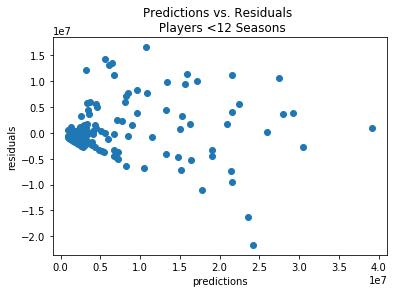

In [17]:
# Replotting residuals vs. predictions with the low season data

predictions = ls_pf.predict(X_test_pf)
residuals  = y_test - predictions

plt.scatter(predictions, residuals)
plt.title('Predictions vs. Residuals \n Players <12 Seasons')
plt.xlabel('predictions')
plt.ylabel('residuals');

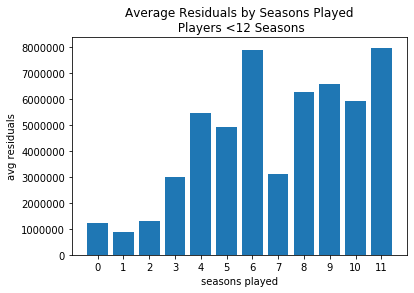

In [18]:
# Replotting average residuals by seasons played and average salary by seasons played
# using the low season data

test_df = pd.DataFrame(y_test)
test_df['predicted'] = predictions
test_df['residuals'] = residuals
test_df = pd.merge(test_df, df, left_index=True, right_index=True, how='left')
test_df['residuals'] = test_df['residuals'].abs()

residuals_by_season = test_df['residuals'].groupby(test_df['seasons']).mean()
plt.bar(x = residuals_by_season.index, height= residuals_by_season)
plt.xticks(residuals_by_season.index)
plt.title('Average Residuals by Seasons Played\n Players <12 Seasons')
plt.xlabel('seasons played')
plt.ylabel('avg residuals');

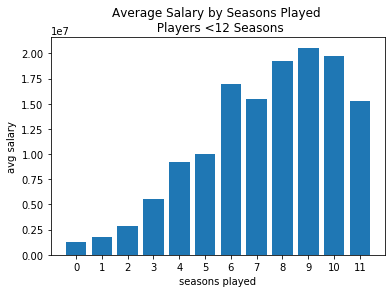

In [19]:
salary_by_season = test_df['19_20_salary_x'].groupby(test_df['seasons']).mean()
plt.bar(x = salary_by_season.index, height= salary_by_season)
plt.xticks(salary_by_season.index)
plt.title('Average Salary by Seasons Played \n Players <12 Seasons')
plt.xlabel('seasons played')
plt.ylabel('avg salary');

## Feature Analysis

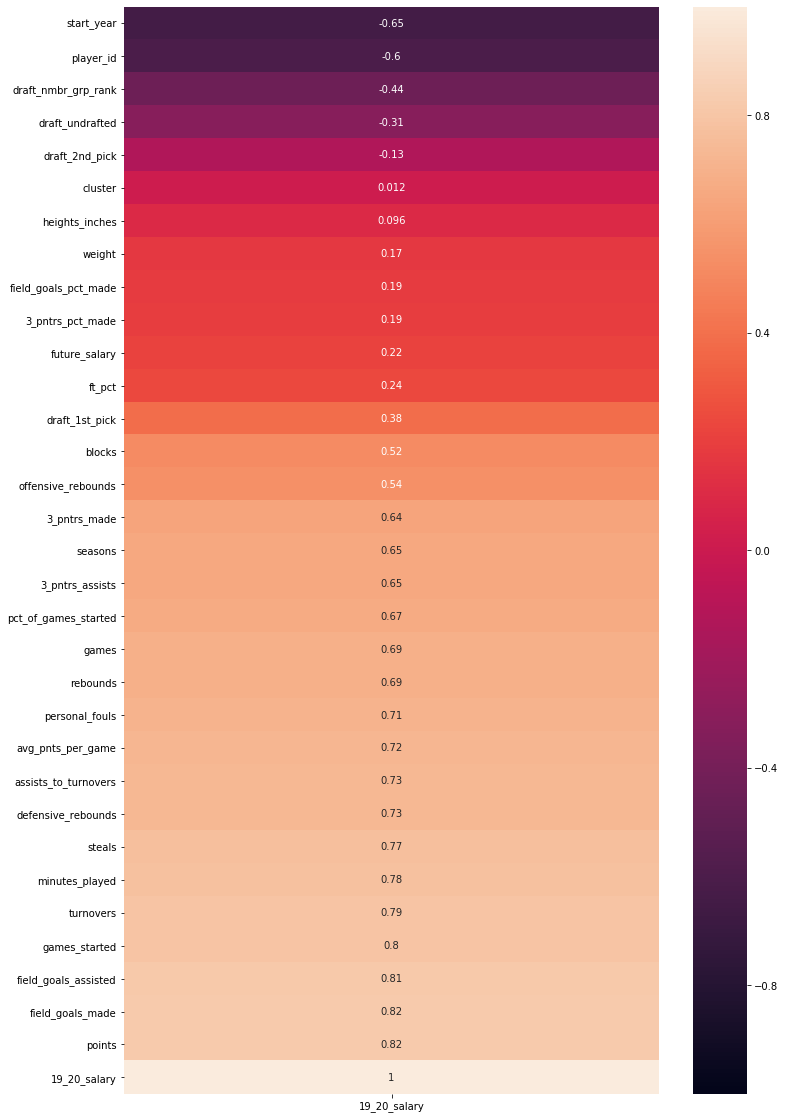

In [20]:
correlations = df.corr()[['19_20_salary']]
plt.figure(figsize=(12,20))
sns.heatmap(correlations.sort_values(by='19_20_salary'), vmax=1, vmin = -1, annot=True);

## Cluster Analysis

In [21]:
# Reading in the entire NBA players dataset with clusters (as opposed to just the testing
# portion of the dataset) and saving it as 'df'

df = pd.read_csv('datasets/NBAPlayersClustered.csv')

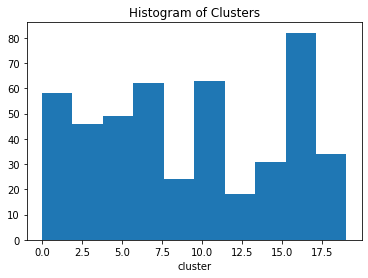

In [22]:
# Creating a histogram of clusters

plt.hist(df['cluster'])
plt.title('Histogram of Clusters')
plt.xlabel('cluster');

In [23]:
# Observing cluster 1

df[df['cluster'] == 1]

# The stars! You would be hard pressed to have a conversation with a basketball lover
# without them talkkng about several of these men. These are some of the highest paid,
# most famous, most respected men in the NBA. These are the kinds of players that are
# offered endorsement deals and teams are built around. 

,player_id,player_name,team,height,weight,seasons,points,games,games_started,minutes_played,...,future_salary,avg_pnts_per_game,pct_of_games_started,heights_inches,draft_1st_pick,draft_2nd_pick,draft_undrafted,draft_number_group,draft_nmbr_grp_rank,cluster
1,201583,Ryan Anderson,HOU,6-9,240.0,11,8001,649,289,16768.0,...,1,12.328197,0.445300,81,1,0,0,21-30,3,1
32,202329,Al-Farouq Aminu,ORL,6-8,220.0,9,5248,688,431,17264.0,...,1,7.627907,0.626453,80,1,0,0,1-10,1,1
45,203084,Harrison Barnes,SAC,6-8,225.0,7,8263,604,543,18823.0,...,1,13.680464,0.899007,80,1,0,0,1-10,1,1
55,201158,Marco Belinelli,SAS,6-5,220.0,12,8294,854,219,19421.0,...,0,9.711944,0.256440,77,1,0,0,11-20,2,1
71,202340,Avery Bradley,LAL,6-3,180.0,9,6702,570,492,16113.0,...,1,11.757895,0.863158,75,1,0,0,11-20,2,1
89,202710,Jimmy Butler,MIA,6-7,230.0,8,9823,577,472,19080.0,...,1,17.024263,0.818024,79,1,0,0,21-30,3,1
91,203484,Kentavious Caldwell-Pope,LAL,6-5,204.0,6,6189,532,391,15558.0,...,1,11.633459,0.734962,77,1,0,0,1-10,1,1
94,201960,DeMarre Carroll,HOU,6-6,215.0,10,5136,575,339,13615.0,...,1,8.932174,0.589565,78,1,0,0,21-30,3,1
101,201163,Wilson Chandler,BKN,6-8,235.0,12,8458,675,482,20259.0,...,0,12.530370,0.714074,80,1,0,0,21-30,3,1
143,201162,Jared Dudley,LAL,6-6,237.0,12,6617,887,286,19983.0,...,0,7.459977,0.322435,78,1,0,0,21-30,3,1


In [24]:
# Observing cluster 19

df[df['cluster'] == 19]

# This is the promising rookie group. We can see our very own Trae Young from ATL here.
# These are people who are very new (0-3 seasons) but have made big names for themselves
# already. You can even see Lonzo Ball on here (of the Lorenzo Ball dynasty) and other
# recently buzzing names like Luka Doncic. 

,player_id,player_name,team,height,weight,seasons,points,games,games_started,minutes_played,...,future_salary,avg_pnts_per_game,pct_of_games_started,heights_inches,draft_1st_pick,draft_2nd_pick,draft_undrafted,draft_number_group,draft_nmbr_grp_rank,cluster
25,203500,Steven Adams,OKC,6-11,265.0,6,5140,525,461,14092.0,...,1,9.790476,0.878095,83,1,0,0,11-20,2,19
61,202687,Bismack Biyombo,CHA,6-8,255.0,8,3271,635,271,12854.0,...,0,5.151181,0.426772,80,1,0,0,1-10,1,19
93,203991,Clint Capela,ATL,6-10,240.0,5,4075,334,274,8674.0,...,1,12.200599,0.820359,82,1,0,0,21-30,3,19
126,202334,Ed Davis,UTA,6-9,218.0,9,4197,665,95,13221.0,...,1,6.311278,0.142857,81,1,0,0,11-20,2,19
134,203476,Gorgui Dieng,MEM,6-10,252.0,6,4017,509,204,11245.0,...,1,7.891945,0.400786,82,1,0,0,21-30,3,19
203,203089,John Henson,DET,6-9,219.0,7,3383,445,160,8752.0,...,0,7.602247,0.359551,81,1,0,0,11-20,2,19
244,201949,James Johnson,MIN,6-7,240.0,10,5039,633,220,13056.0,...,1,7.960506,0.347551,79,1,0,0,11-20,2,19
256,203077,Michael Kidd-Gilchrist,DAL,6-6,232.0,7,3742,442,356,10929.0,...,0,8.466063,0.805430,78,1,0,0,1-10,1,19
277,203458,Alex Len,SAC,7-0,250.0,6,3683,461,180,9095.0,...,0,7.989154,0.390456,84,1,0,0,1-10,1,19
279,203086,Meyers Leonard,MIA,7-0,260.0,7,2483,442,91,7081.0,...,0,5.617647,0.205882,84,1,0,0,11-20,2,19


In [25]:
# Observing cluster 13

df[df['cluster'] == 13]

# These are the extreme veterans. These are the people who have been playing the longest
# and have made HUGE impacts on the NBA. While all of these players are amazing it is
# easy to tell the 3 of them apart when you calculate points per season. Carmelo Anthony
# has 1643 points per season while LeBron James has 2128. Vince Carter has been playing
# the longest but only 1224 points per season. This correlates well to their salaries:
# LeBron James is still one of the highest paid people in the NBA while the other two
# are not. 

,player_id,player_name,team,height,weight,seasons,points,games,games_started,minutes_played,...,future_salary,avg_pnts_per_game,pct_of_games_started,heights_inches,draft_1st_pick,draft_2nd_pick,draft_undrafted,draft_number_group,draft_nmbr_grp_rank,cluster
40,2772,Trevor Ariza,POR,6-8,215.0,15,11193,1063,730,31615.0,...,1,10.529633,0.686736,80,0,1,0,41-50,5,13
49,201587,Nicolas Batum,CHA,6-9,230.0,11,9118,789,714,24732.0,...,1,11.556401,0.904943,81,1,0,0,21-30,3,13
169,201188,Marc Gasol,TOR,6-11,255.0,11,12196,831,816,27556.0,...,0,14.676294,0.981949,83,0,1,0,41-50,5,13
170,200752,Rudy Gay,SAS,6-8,250.0,13,16045,938,777,31156.0,...,1,17.105544,0.828358,80,1,0,0,1-10,1,13
186,201145,Jeff Green,HOU,6-8,235.0,11,11654,899,544,26554.0,...,0,12.963293,0.605117,80,1,0,0,1-10,1,13
219,201143,Al Horford,PHI,6-9,240.0,12,11794,845,838,27604.0,...,1,13.957396,0.991716,81,1,0,0,1-10,1,13
227,2738,Andre Iguodala,MIA,6-6,215.0,15,13514,1121,779,37276.0,...,1,12.055308,0.694915,78,1,0,0,1-10,1,13
263,2594,Kyle Korver,MIL,6-7,212.0,16,11903,1224,422,31056.0,...,0,9.724673,0.344771,79,0,1,0,51-60,6,13
285,201567,Kevin Love,CLE,6-8,251.0,11,12976,712,629,22765.0,...,1,18.224719,0.883427,80,1,0,0,1-10,1,13
455,101107,Marvin Williams,MIL,6-8,237.0,14,10941,1066,828,30040.0,...,0,10.263602,0.776735,80,1,0,0,1-10,1,13


In [26]:
# Observing cluster 12

df[df['cluster'] == 12]

# These are the reliable, good players. These players were almost all drafted 2nd round,
# start a decent number of games, average a good number of points per game (5-15),
# and have solid overall numbers for their careers. These people have been playing around 
# 3-8 years. These are your reliable, supportive teammates that are necessary to support
# a winning team. 

,player_id,player_name,team,height,weight,seasons,points,games,games_started,minutes_played,...,future_salary,avg_pnts_per_game,pct_of_games_started,heights_inches,draft_1st_pick,draft_2nd_pick,draft_undrafted,draft_number_group,draft_nmbr_grp_rank,cluster
37,2546,Carmelo Anthony,POR,6-8,238.0,16,26293,1113,1105,39719.0,...,0,23.623540,0.992812,80,1,0,0,1-10,1,12
96,1713,Vince Carter,ATL,6-6,220.0,21,25723,1540,982,46359.0,...,0,16.703247,0.637662,78,1,0,0,1-10,1,12
145,201142,Kevin Durant,BKN,6-10,240.0,12,22940,849,849,31304.0,...,1,27.020024,1.000000,82,1,0,0,1-10,1,12
191,201935,James Harden,HOU,6-5,220.0,10,20686,825,612,28310.0,...,1,25.073939,0.741818,77,1,0,0,1-10,1,12
238,2544,LeBron James,LAL,6-9,250.0,16,34058,1257,1256,48293.0,...,1,27.094670,0.999204,81,1,0,0,1-10,1,12
358,101108,Chris Paul,OKC,6-1,175.0,14,18711,1013,1013,35353.0,...,1,18.470879,1.000000,73,1,0,0,1-10,1,12
447,201566,Russell Westbrook,HOU,6-3,200.0,11,20288,873,856,30196.0,...,1,23.239404,0.980527,75,1,0,0,1-10,1,12


In [27]:
# Observing cluster 4

df[df['cluster'] == 4]

# These are the new players who have not shown us much yet. The highest number of games 
# played is 10 and none of these players have started any games. The majority of these
# players are making the minimum salary. 

,player_id,player_name,team,height,weight,seasons,points,games,games_started,minutes_played,...,future_salary,avg_pnts_per_game,pct_of_games_started,heights_inches,draft_1st_pick,draft_2nd_pick,draft_undrafted,draft_number_group,draft_nmbr_grp_rank,cluster
7,203459,Allen Crabbe,MIN,6-0,170.0,6,3453,381,113,9125.0,...,0,9.062992,0.296588,72,0,1,0,31-40,4,4
57,202722,Davis Bertans,WAS,6-10,225.0,3,2188,273,32,5079.0,...,0,8.014652,0.117216,82,0,1,0,41-50,5,4
62,202357,Nemanja Bjelica,SAC,6-10,234.0,4,2665,333,153,7245.0,...,1,8.003003,0.459459,82,0,1,0,31-40,4,4
78,1627763,Malcolm Brogdon,IND,6-5,229.0,3,3177,235,160,6722.0,...,1,13.519149,0.680851,77,0,1,0,31-40,4,4
79,1628415,Dillon Brooks,MEM,6-7,225.0,2,2032,164,138,4498.0,...,1,12.390244,0.841463,79,0,1,0,41-50,5,4
85,1628418,Thomas Bryant,WAS,6-10,248.0,2,1225,124,80,2445.0,...,1,9.879032,0.645161,82,0,1,0,41-50,5,4
135,203915,Spencer Dinwiddie,BKN,6-5,215.0,5,4080,316,129,8132.0,...,1,12.911392,0.408228,77,0,1,0,31-40,4,4
179,203924,Jerami Grant,DEN,6-8,210.0,5,4102,446,167,10893.0,...,1,9.197309,0.374439,80,0,1,0,31-40,4,4
193,1626149,Montrezl Harrell,LAC,6-7,240.0,4,4023,317,25,6623.0,...,0,12.690852,0.078864,79,0,1,0,31-40,4,4
195,203925,Joe Harris,BKN,6-6,220.0,5,3320,324,164,7834.0,...,0,10.246914,0.506173,78,0,1,0,31-40,4,4


In [28]:
# Observing clusters 10 and 11

df[(df['cluster'] == 10)|(df['cluster'] == 11)]

# "The middle" These players are all relatively new (1-4 seasons) and have decent records.
# They will not be qualifying for any awards but they are good players and are likely
# often utilized when other players are injured. 

,player_id,player_name,team,height,weight,seasons,points,games,games_started,minutes_played,...,future_salary,avg_pnts_per_game,pct_of_games_started,heights_inches,draft_1st_pick,draft_2nd_pick,draft_undrafted,draft_number_group,draft_nmbr_grp_rank,cluster
3,1628413,Jonah Bolden,PHX,6-6,215.0,1,217,51,10,686.0,...,0,4.254902,0.196078,78,0,1,0,31-40,4,10
24,1627820,Tyrone Wallace,ATL,6-5,198.0,2,549,106,19,1639.0,...,0,5.179245,0.179245,77,0,1,0,51-60,6,10
31,1628443,Kadeem Allen,BOS,6-1,200.0,2,258,47,2,640.0,...,0,5.489362,0.042553,73,0,1,0,51-60,6,10
42,1628407,Dwayne Bacon,CHA,6-6,221.0,2,715,135,30,2159.0,...,1,5.296296,0.222222,78,0,1,0,31-40,4,10
48,1628966,Keita Bates-Diop,DEN,6-8,229.0,1,409,69,3,1169.0,...,1,5.927536,0.043478,80,0,1,0,41-50,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,202691,Klay Thompson,GSW,6-6,215.0,8,11995,615,578,20338.0,...,1,19.504065,0.939837,78,1,0,0,11-20,2,11
440,202689,Kemba Walker,BOS,6-0,184.0,8,13058,654,609,22168.0,...,1,19.966361,0.931193,72,1,0,0,1-10,1,11
441,202322,John Wall,WAS,6-4,210.0,9,10879,573,561,20544.0,...,1,18.986038,0.979058,76,1,0,0,1-10,1,11
444,1629682,Tremont Waters,BOS,5-10,175.0,0,33,10,0,89.0,...,0,3.300000,0.000000,70,0,1,0,51-60,6,10


### Coefficient Analysis

In [29]:
# Reading in the csv with all feature and coefficients

coefs = pd.read_csv('datasets/Coefficients.csv')

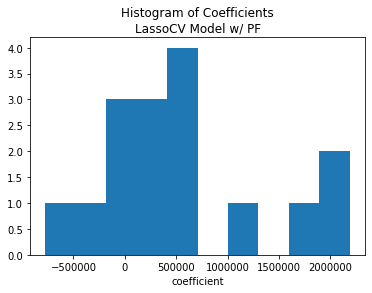

In [30]:
# Creating a histogram of all coefficients in the model

plt.hist(coefs['coef'])
plt.title('Histogram of Coefficients\nLassoCV Model w/ PF')
plt.xlabel('coefficient');


In [31]:
# Observing the features with the 5 most positive coefficients

coefs.sort_values(by='coef', ascending=False).head()

,feature,coef
2,defensive_rebounds,2.188900e+06
0,games_started,2.129440e+06
5,avg_pnts_per_game,1.716678e+06
9,games_started pct_of_games_started,1.162388e+06
15,avg_pnts_per_game^2,6.371077e+05


In [32]:
# Observing the features with the 5 least positive coefficients

coefs.sort_values(by='coef', ascending=True).head()

,feature,coef
14,blocks turnovers,-772418.521895
7,games^2,-368368.302504
13,assists_to_turnovers^2,43677.987996
10,3_pntrs_made^2,73289.076551
12,3_pntrs_assists future_salary,76780.034183


In [33]:
# Observing all coefficients

coefs

,feature,coef
0,games_started,2.129440e+06
1,assists_to_turnovers,2.919336e+05
2,defensive_rebounds,2.188900e+06
3,steals,4.404733e+05
4,future_salary,1.579993e+05
5,avg_pnts_per_game,1.716678e+06
6,pct_of_games_started,5.626516e+05
7,games^2,-3.683683e+05
8,games start_year,4.591182e+05
9,games_started pct_of_games_started,1.162388e+06
